# Ananlyzing monthly death in Chicago-Illinois

## Import required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
chicagoCovid = pd.read_csv("assets/main data/Chicago/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv")
chicagoCovid.head()


,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60603,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,0,0,...,0,0.0,0.0,0,0,0.0,0.0,"1,174",60603-2020-10,POINT (-87.625473 41.880112)
1,60603,11,03/08/2020,03/14/2020,NaN,NaN,NaN,NaN,0,0,...,0,0.0,0.0,0,0,0.0,0.0,"1,174",60603-2020-11,POINT (-87.625473 41.880112)
2,60603,12,03/15/2020,03/21/2020,NaN,NaN,NaN,NaN,1,1,...,85.2,0.0,0.0,0,0,0.0,0.0,"1,174",60603-2020-12,POINT (-87.625473 41.880112)
3,60603,13,03/22/2020,03/28/2020,NaN,NaN,NaN,NaN,3,4,...,340.7,0.0,0.0,0,0,0.0,0.0,"1,174",60603-2020-13,POINT (-87.625473 41.880112)
4,60603,14,03/29/2020,04/04/2020,NaN,NaN,NaN,NaN,6,10,...,851.8,0.0,0.0,0,0,0.0,0.0,"1,174",60603-2020-14,POINT (-87.625473 41.880112)


## Group by starting week

In [3]:
weeklyDeath = chicagoCovid[["Week Start", "Deaths - Weekly"]].groupby("Week Start").sum()
weeklyDeath.head()

,Deaths - Weekly
Week Start,
01/03/2021,111
01/10/2021,105
01/17/2021,91
01/24/2021,91
01/31/2021,68


## Resest index(Week Start)

In [4]:
weeklyDeath = weeklyDeath.reset_index()
weeklyDeath

,Week Start,Deaths - Weekly
0,01/03/2021,111
1,01/10/2021,105
2,01/17/2021,91
3,01/24/2021,91
4,01/31/2021,68
...,...,...
75,11/29/2020,186
76,12/06/2020,193
77,12/13/2020,158
78,12/20/2020,154


## Change type of **Week Start** to datetime

In [5]:
weeklyDeath["Week Start"] = pd.to_datetime(weeklyDeath["Week Start"])
weeklyDeath


,Week Start,Deaths - Weekly
0,2021-01-03,111
1,2021-01-10,105
2,2021-01-17,91
3,2021-01-24,91
4,2021-01-31,68
...,...,...
75,2020-11-29,186
76,2020-12-06,193
77,2020-12-13,158
78,2020-12-20,154


## Sort the dataframe by its **Week Start** column

In [6]:
weeklyDeath = weeklyDeath.sort_values(by=["Week Start"])
weeklyDeath

,Week Start,Deaths - Weekly
9,2020-03-01,0
11,2020-03-08,0
13,2020-03-15,7
15,2020-03-22,26
17,2020-03-29,133
...,...,...
54,2021-08-08,23
56,2021-08-15,22
58,2021-08-22,25
60,2021-08-29,33


## Get month and years of deaths (regardless to the day)

In [7]:
months = (pd.DatetimeIndex(weeklyDeath["Week Start"]).month)
years = (pd.DatetimeIndex(weeklyDeath["Week Start"]).year)
monthsYear = []
for i in range(len(months)):
    monthsYear.append(str(months[i]) + "-" + str(years[i]))
weeklyDeath["month_year"] = monthsYear
weeklyDeath.head(10)

,Week Start,Deaths - Weekly,month_year
9,2020-03-01,0,3-2020
11,2020-03-08,0,3-2020
13,2020-03-15,7,3-2020
15,2020-03-22,26,3-2020
17,2020-03-29,133,3-2020
19,2020-04-05,199,4-2020
21,2020-04-12,243,4-2020
23,2020-04-19,284,4-2020
25,2020-04-26,314,4-2020
27,2020-05-03,341,5-2020


## Group by the month of the year

In [8]:
monthlyDeath = weeklyDeath.drop(columns=["Week Start"]).groupby("month_year").sum().reset_index().sort_values(by=["month_year"])
monthlyDeath["month_year"] = pd.to_datetime(monthlyDeath["month_year"])
monthlyDeath = monthlyDeath.sort_values(by=["month_year"])
monthlyDeath = monthlyDeath.reset_index(drop=True)
monthlyDeath

,month_year,Deaths - Weekly
0,2020-03-01,166
1,2020-04-01,1040
2,2020-05-01,1163
3,2020-06-01,332
4,2020-07-01,107
5,2020-08-01,106
6,2020-09-01,83
7,2020-10-01,126
8,2020-11-01,632
9,2020-12-01,654


## Timeseries plot

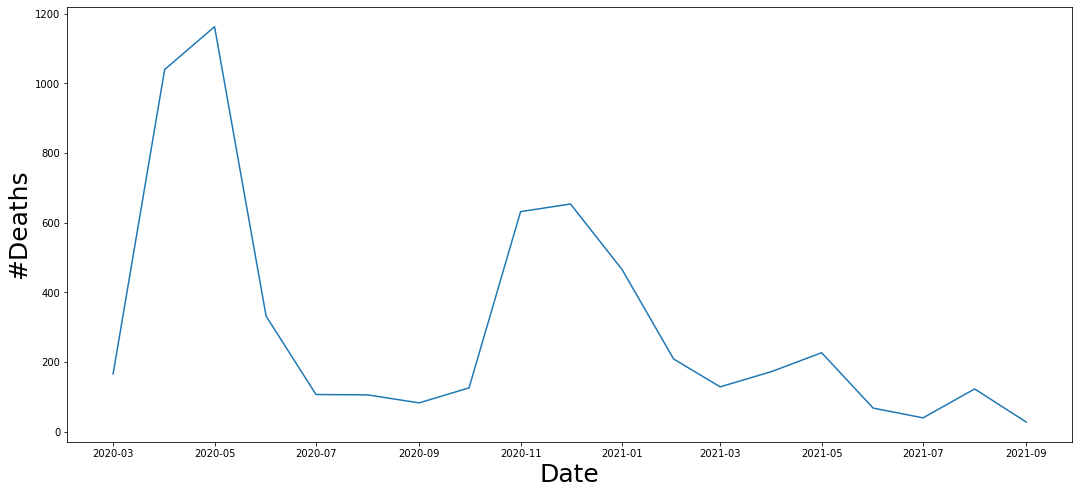

In [10]:
plt.figure(figsize=(18,8))
plt.xlabel("Date", fontsize=25)
plt.ylabel("#Deaths", fontsize=25)
plt.plot(monthlyDeath["month_year"], monthlyDeath["Deaths - Weekly"])
plt.show()


# Ananlyzing VIIRS average radian

## Initialize the ee and geemap modules

In [13]:
import geemap,ee
try:
    ee.Initialize()
except:
    ee.Authenticate()

## Drawing the Chicago on map

In [51]:
chicago = ee.FeatureCollection("users/amirhkiani1998/chicago").geometry()

In [76]:
newMap = geemap.Map()
newMap.addLayer(chicago)
newMap.centerObject(chicago)
newMap

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

## Get VIIRS from google earth engine

In [15]:
viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG").filterDate("2019-09-01", "2021-10-01").select("avg_rad")

In [113]:
newMap = geemap.Map()
newMap.addLayer(chicago)
newMap.addLayer(viirs.first())
newMap.centerObject(chicago)
newMap

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

## Combine reducers to get mean, standard deviation, min, max

In [49]:
reducers = ee.Reducer.mean().combine(reducer2=ee.Reducer.stdDev(), sharedInputs=True
).combine(reducer2=ee.Reducer.min(), sharedInputs=True
).combine(reducer2=ee.Reducer.max(), sharedInputs=True)

## Map over all images in VIIRS

In [52]:
def imageClip(image):
    return image.clip(chicago)

In [53]:
viirsClipped = viirs.map(imageClip)

## Change type of **clipped viirs image collection** to **list**

In [54]:
size = viirsClipped.size().getInfo()
viirsClippedList = viirsClipped.toList(count=viirsClipped.size().getInfo())


In [73]:
myMap = geemap.Map()
viirs2 = viirs.toList(20)
sampleImage = ee.Image(viirs2.get(8))
myMap.addLayer(sampleImage)
print(sampleImage.date().format().getInfo())
myMap.centerObject(chicago)
myMap

2020-05-01T00:00:00


Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [57]:
data = []
for i in range(size):
    image = ee.Image(viirsClippedList.get(i))
    date = image.date().format().getInfo()
    stats = image.reduceRegion(reducer=reducers,bestEffort=True)
    imageData = stats.getInfo()
    imageData["date"] = date
    data.append(imageData)

## Make dataframe from VIIRS data

In [64]:
dataframe = pd.DataFrame(data)
dataframe["date"] = pd.to_datetime(dataframe["date"])
dataframe.head(20)

,avg_rad_max,avg_rad_mean,avg_rad_min,avg_rad_stdDev,date
0,326.309998,82.884959,5.60,38.126604,2019-09-01
1,678.440002,84.453021,5.93,44.720515,2019-10-01
2,318.880005,86.831915,5.19,38.567080,2019-11-01
3,230.690002,77.235566,4.70,31.121619,2019-12-01
4,224.759995,83.276270,7.48,28.755471,2020-01-01
5,512.070007,89.211177,6.85,38.922216,2020-02-01
6,222.320007,70.617730,7.10,28.525217,2020-03-01
7,495.309998,78.583679,7.05,35.313326,2020-04-01
8,0.000000,0.000000,0.00,0.000000,2020-05-01
9,0.000000,0.000000,0.00,0.000000,2020-06-01


## Save **VIIRS data** and **Chicago monthly death** as csv files

In [74]:
dataframe.to_csv("assets/main data/Chicago/VIIRS2019_09__2021_5.csv")
monthlyDeath.to_csv("assets/main data/Chicago/monthly_death.csv")